## 주성분 분석
- 차원 = 특성
- 차원 축소(dimensionality reduction) 알고리즘: 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 성능을 향상시킨다.
    - 주성분 분석(principal component analysis) = PCA : 데이터에서 가장 분산이 큰 방향을 찾는 알고리즘, 방향을 주성분이라고 한다.

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-03-31 21:27:53--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2024-03-31 21:27:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2024-03-31 21:27:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 개수 지정
pca.fit(fruits_2d) # 비지도 학습이기 때문에 타깃값 미제공

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [8]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
plt.show()

주성분을 그림으로 그려보기
- 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것
    - 데이터셋에 있는 어떤 특징을 잡아낸 것

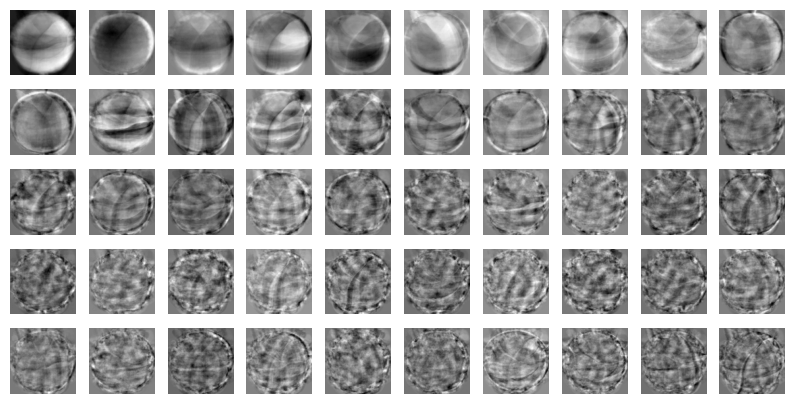

In [9]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터의 차원을 50으로 줄여보기
- transform 메서드

In [10]:
print(fruits_2d.shape)

(300, 10000)


50개의 주성분을 찾은 PCA 모델을 사용해 (300, 50) 크기의 배열로 변환

In [11]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성
- inverse_transform 메서드

50개의 차원으로 축소한 데이터를 10,000개의 특성으로 복원

In [12]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


데이터를 100x100 크기로 바꾸어 100개씩 나누어 출력

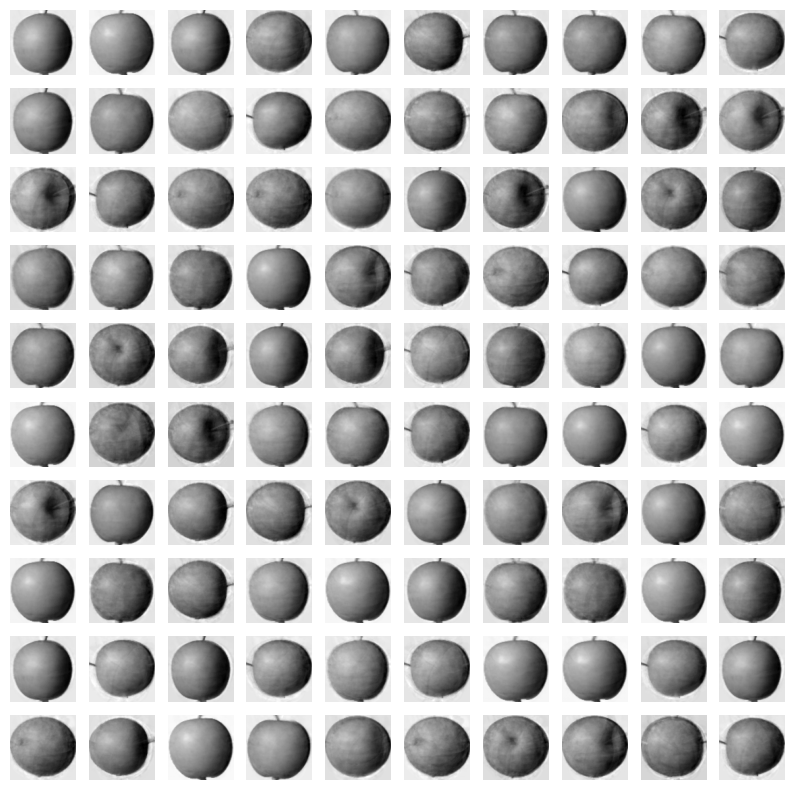

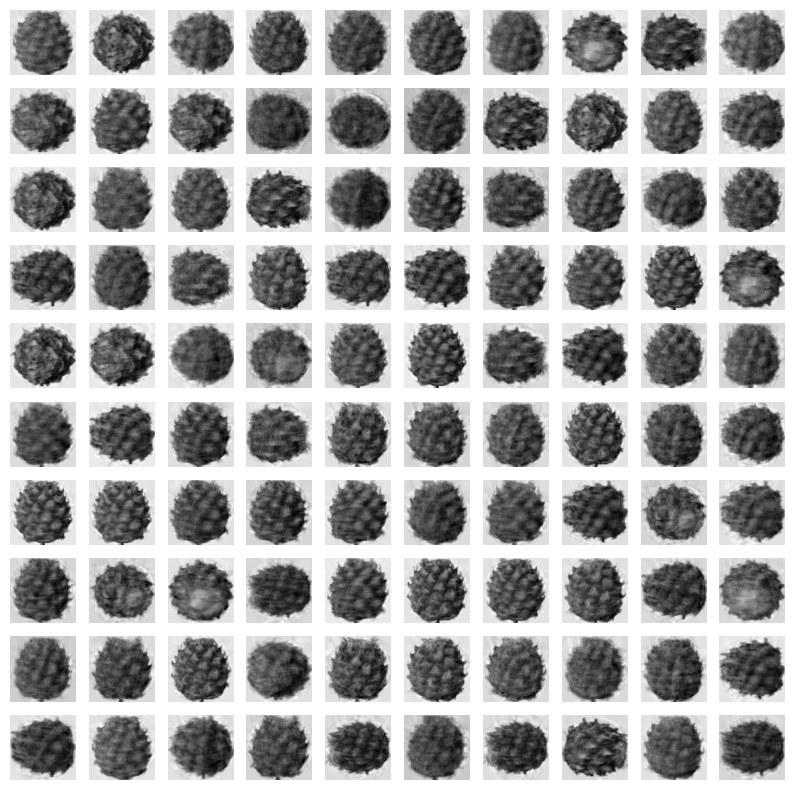

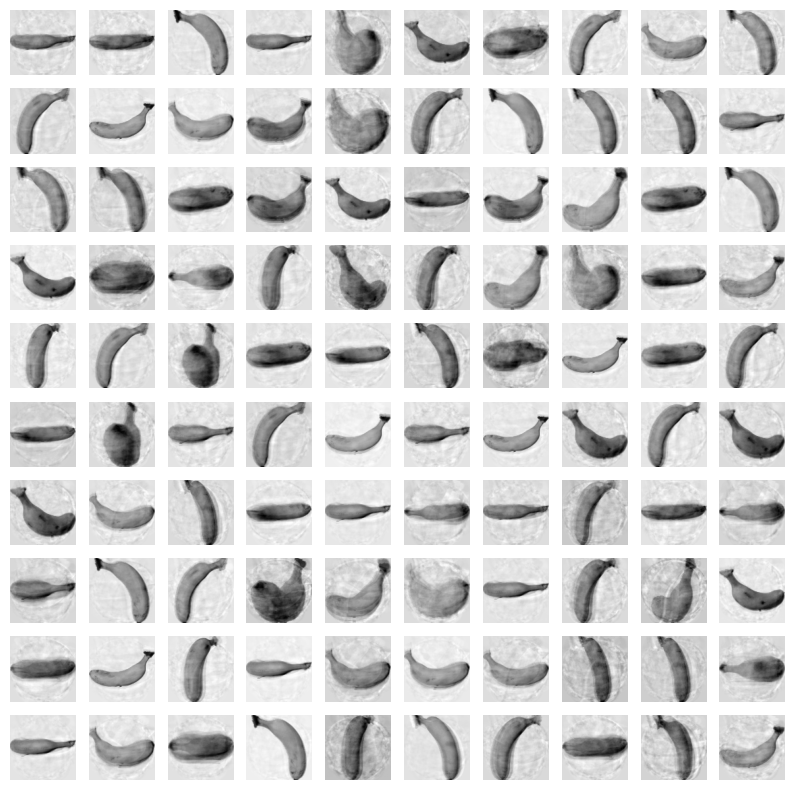

In [13]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

### 설명된 분산
주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- explained_variance_ratio 메서드

In [14]:
print(np.sum(pca.explained_variance_ratio_))

0.921452337796298


처음 10개의 주성분이 대부분의 분산을 표현

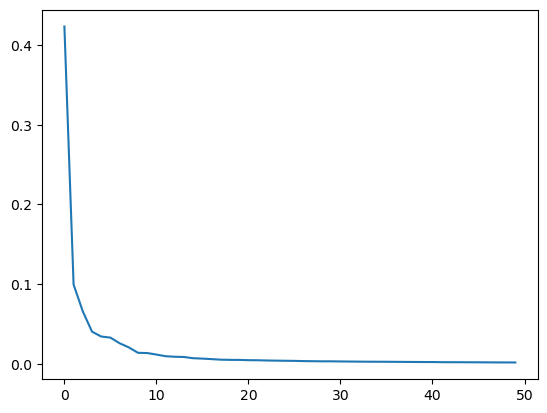

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

### 다른 알고리즘과 함께 사용하기
과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 차이를 알아보기
- 과일 사진을 분류해야 하므로 로지스틱 회귀 모델 사용

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

지도 학습 모델을 사용하므로 타깃값 생성하기
- 리스트와 정수를 곱하면 리스트 안의 원소를 정수만큼 반복한다.

In [17]:
target = np.array([0]*100 + [1]*100 + [2]*100)

원본 데이터인 fruits_2d 사용
- 로지스틱 회귀 모델에서 성능 가늠을 위해 교차 검증 수행하기(cross_validate 메서드)

In [18]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.33911938667297364


PCA 로 축소한 모델 사용했을 때
- 결과 값: 훈련시간 20배 이상 감소

In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.003855466842651367


주성분을 비율로 지정해보기

In [20]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

찾은 주성분의 개수 확인

In [22]:
print(pca.n_components_)

2


모델로 원본 데이터 변환

In [23]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


2개의 특성으로 교차검증 해보기

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.008028554916381835


/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leejieun/miniforge3/envs/ai/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


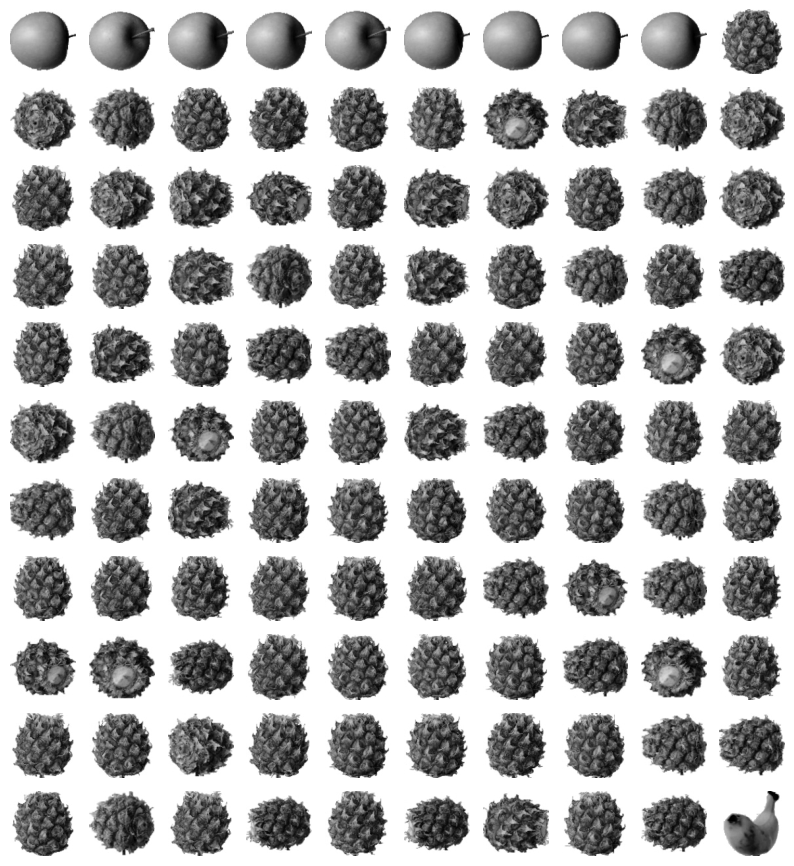

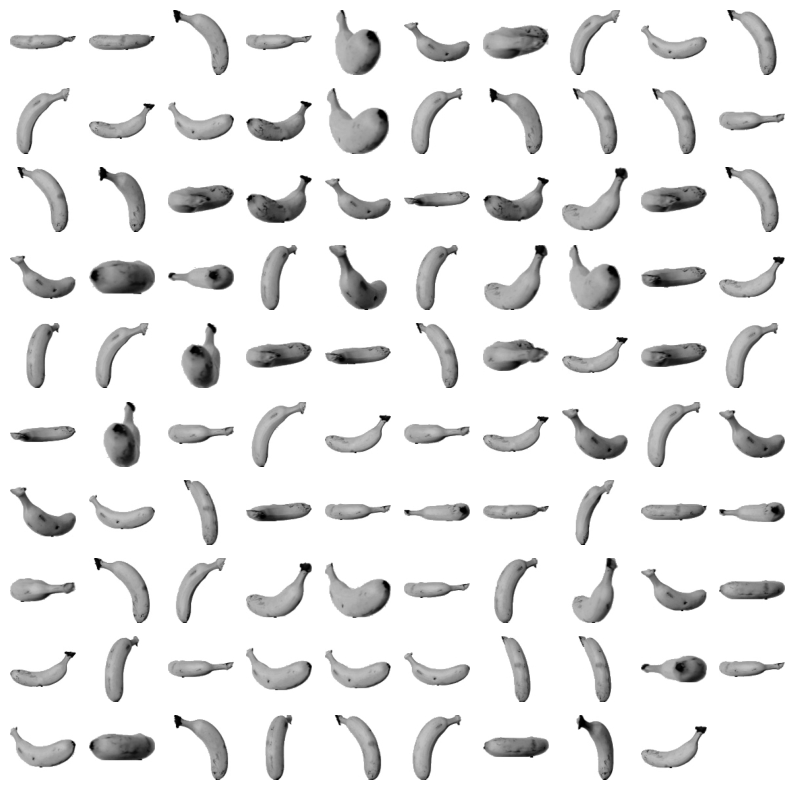

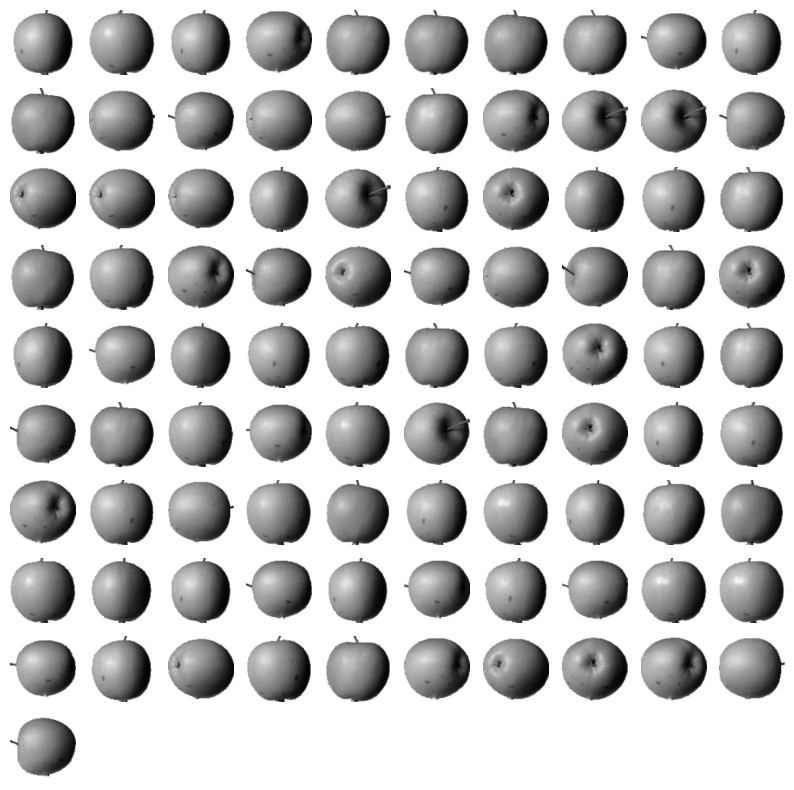

In [26]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

훈련 데이터의 차원을 줄이면 시각화하기 쉽고, 예상치 못한 통찰을 얻을 수 있다.
- 클러스터별로 나누어 산점도 그려보기
    - 사과와 파인애플 클러스터의 경계가 가깝기 때문에 위의 이미지처럼 혼동을 일으킬 수 있다.

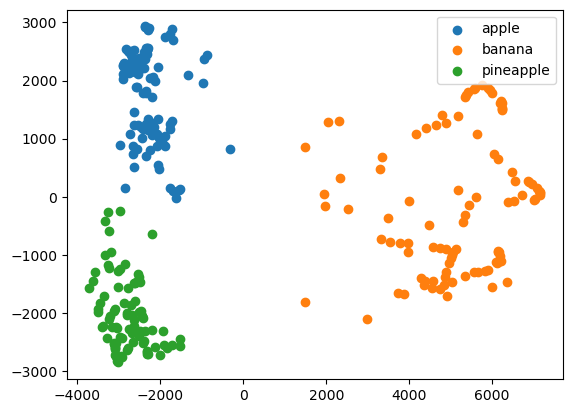

In [27]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana', 'pineapple'])
plt.show()